# 로지스틱 회귀분석
sklearn.linear_model.LogisticRegression  
panalty : 규제항 추가,none,l1,l2(default)  
C : 규제항에 곱하는 상수의 역수로 작을수록 규제가 강함(default=1)  
max_iter : 최대 반복횟수(default=100)

In [11]:
import pandas as pd

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [2]:
from sklearn.datasets import load_breast_cancer

## breast_cancer 데이터셋

In [13]:
bre=load_breast_cancer()
features=pd.DataFrame(bre.data,columns=bre['feature_names'])
target=pd.DataFrame(bre.target,columns=['target'])

In [14]:
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [20]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,stratify=target)

In [21]:
lr_lo=LogisticRegression(C=0.5,max_iter=2000)

In [23]:
lr_lo.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.5, max_iter=2000)

In [24]:
from sklearn.metrics import roc_curve,auc

In [25]:
y_score=lr_lo.predict_proba(X_test)[:,1]

In [27]:
fpr,tpr,thresholds=roc_curve(y_test,y_score)

In [28]:
import matplotlib.pyplot as plt

In [30]:
AUC=auc(fpr,tpr)

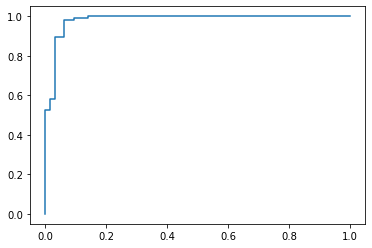

In [29]:
plt.plot(fpr,tpr)

In [31]:
AUC

0.9817464953271028

## iris 데이터셋

In [32]:
from sklearn.datasets import load_iris

In [36]:
data=pd.DataFrame(load_iris().data,columns=load_iris().feature_names)
target=pd.DataFrame(load_iris().target,columns=['target'])

In [37]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [45]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.3,stratify=target)

In [46]:
lr_lo2=LogisticRegression()

In [50]:
lr_lo2.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
from sklearn.metrics import f1_score

In [53]:
y_pred=lr_lo2.predict(X_test)

In [55]:
macro_f1=f1_score(y_test,y_pred,average='macro')

In [56]:
macro_f1

0.9553571428571429